<a href="https://colab.research.google.com/github/vigneshpatel14/Deep-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math

class Preceptron:

  def __init__(self , num_inputs , thre):
    self.weights = [0.0] * num_inputs
    self.bias = 0.0
    self.thre  = thre


  def predict(self , inputs):
    weighted_sum = sum(w*x for w , x in zip(self.weights , inputs)) + self.bias

    output = 1/(1+math.exp(-weighted_sum)) # sgmoid function

    return 1 if output > self.thre else 0


  def train(self, training_data , targets , learning_rate , epochs):
    for epoch in range(epochs):
      for input , target in zip(training_data , targets):
        print(input , target)
        prediction = self.predict(input)  # step 1
        print(prediction)
        error = target - prediction # step 2
        print(error)
        for i in range(len(self.weights)):
          self.weights[i] += learning_rate*error* input[i]
          self.bias += learning_rate *error

In [2]:
preceptron = Preceptron(num_inputs = 2 , thre = .5)

training_data = [
    [0,0],
    [0,1],
    [1,0],
    [1,1]
]

target = [0,0,0,1]

learning_rate = .1
epochs = 10

preceptron.train(training_data , target, learning_rate , epochs)


for inputs in training_data:
  prediction = preceptron.predict(inputs)
  print(f"inputs - {inputs} and prediction = {prediction}")

[0, 0] 0
0
0
[0, 1] 0
0
0
[1, 0] 0
0
0
[1, 1] 1
0
1
[0, 0] 0
1
-1
[0, 1] 0
1
-1
[1, 0] 0
0
0
[1, 1] 1
0
1
[0, 0] 0
0
0
[0, 1] 0
1
-1
[1, 0] 0
0
0
[1, 1] 1
0
1
[0, 0] 0
0
0
[0, 1] 0
1
-1
[1, 0] 0
1
-1
[1, 1] 1
0
1
[0, 0] 0
0
0
[0, 1] 0
0
0
[1, 0] 0
1
-1
[1, 1] 1
0
1
[0, 0] 0
0
0
[0, 1] 0
0
0
[1, 0] 0
1
-1
[1, 1] 1
0
1
[0, 0] 0
0
0
[0, 1] 0
1
-1
[1, 0] 0
0
0
[1, 1] 1
1
0
[0, 0] 0
0
0
[0, 1] 0
0
0
[1, 0] 0
0
0
[1, 1] 1
1
0
[0, 0] 0
0
0
[0, 1] 0
0
0
[1, 0] 0
0
0
[1, 1] 1
1
0
[0, 0] 0
0
0
[0, 1] 0
0
0
[1, 0] 0
0
0
[1, 1] 1
1
0
inputs - [0, 0] and prediction = 0
inputs - [0, 1] and prediction = 0
inputs - [1, 0] and prediction = 0
inputs - [1, 1] and prediction = 1


In [3]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.Wih = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.bih = np.zeros((1, self.hidden_size))

        self.Who = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.bho = np.zeros((1, self.output_size))

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, inputs):
        self.hidden_input = np.dot(inputs, self.Wih) + self.bih
        self.hidden_output = self._sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.Who) + self.bho
        self.output_prediction = self._sigmoid(self.output_input)

        return self.output_prediction

    def backward_propagation(self, inputs, targets, outputs):
        self.output_error = targets - outputs
        self.delta_output = self.output_error * self._sigmoid_derivative(outputs)

        self.hidden_error = np.dot(self.delta_output, self.Who.T)
        self.delta_hidden = self.hidden_error * self._sigmoid_derivative(self.hidden_output)

        dWho = np.dot(self.hidden_output.T, self.delta_output)
        dbho = np.sum(self.delta_output, axis=0, keepdims=True)

        dWih = np.dot(inputs.T, self.delta_hidden)
        dbih = np.sum(self.delta_hidden, axis=0, keepdims=True)

        return dWih, dbih, dWho, dbho

    def update_parameters(self, dWih, dbih, dWho, dbho):
        self.Wih += dWih * self.learning_rate
        self.bih += dbih * self.learning_rate
        self.Who += dWho * self.learning_rate
        self.bho += dbho * self.learning_rate

    def train(self, X_train, y_train, epochs):
        for epoch in range(epochs):
            outputs = self.forward_propagation(X_train)
            loss = np.mean(np.square(y_train - outputs))
            dWih, dbih, dWho, dbho = self.backward_propagation(X_train, y_train, outputs)
            self.update_parameters(dWih, dbih, dWho, dbho)

            if (epoch + 1) % 1000 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

    def predict(self, inputs):
        return self.forward_propagation(inputs)

if __name__ == "__main__":
    X_train = np.array([[0, 0],
                        [0, 1],
                        [1, 0],
                        [1, 1]])

    y_train = np.array([[0],
                        [1],
                        [1],
                        [0]])

    input_size = 2
    hidden_size = 4
    output_size = 1
    learning_rate = 0.5
    epochs = 10000

    print("Training Neural Network for XOR problem...")
    nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
    nn.train(X_train, y_train, epochs)
    print("\nTraining complete.")

    print("\nTesting predictions:")
    predictions = nn.predict(X_train)
    print("Inputs:")
    print(X_train)
    print("\nPredicted Probabilities (raw output):")
    print(predictions)
    print("\nPredictions (rounded to 0 or 1):")
    print(np.round(predictions))
    print("\nTrue Labels:")
    print(y_train)

    accuracy = np.mean(np.round(predictions) == y_train)
    print(f"\nAccuracy on training data: {accuracy * 100:.2f}%")

    new_input = np.array([[0, 1]])
    prediction_new = nn.predict(new_input)
    print(f"\nPrediction for input {new_input}: {np.round(prediction_new[0][0])} (raw: {prediction_new[0][0]:.4f})")

Training Neural Network for XOR problem...
Epoch 1000/10000, Loss: 0.2500
Epoch 2000/10000, Loss: 0.2500
Epoch 3000/10000, Loss: 0.2500
Epoch 4000/10000, Loss: 0.2500
Epoch 5000/10000, Loss: 0.2500
Epoch 6000/10000, Loss: 0.2500
Epoch 7000/10000, Loss: 0.2500
Epoch 8000/10000, Loss: 0.2500
Epoch 9000/10000, Loss: 0.2500
Epoch 10000/10000, Loss: 0.2500

Training complete.

Testing predictions:
Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Predicted Probabilities (raw output):
[[0.49999654]
 [0.49999978]
 [0.50000022]
 [0.50000346]]

Predictions (rounded to 0 or 1):
[[0.]
 [0.]
 [1.]
 [1.]]

True Labels:
[[0]
 [1]
 [1]
 [0]]

Accuracy on training data: 50.00%

Prediction for input [[0 1]]: 0.0 (raw: 0.5000)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('customer_churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [ ]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
def uniq(df):
  for col in df.columns:
   print(col)
   print(df[col].unique())

uniq(df)

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
['29.85' '1889

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [ ]:
pd.to_numeric(df.TotalCharges , errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [ ]:
df[pd.to_numeric(df.TotalCharges , errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.shape

(7043, 20)

In [ ]:
df.iloc[488].TotalCharges

' '

In [ ]:
df[df.TotalCharges != ' '].shape

(7032, 20)

In [ ]:
df1 = df[df.TotalCharges != ' ']

In [ ]:
df1.shape

(7032, 20)

In [ ]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [ ]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
df1[df1.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
df1.Churn.value_counts()

,count
Churn,
No,5163
Yes,1869


***Data Visualization***

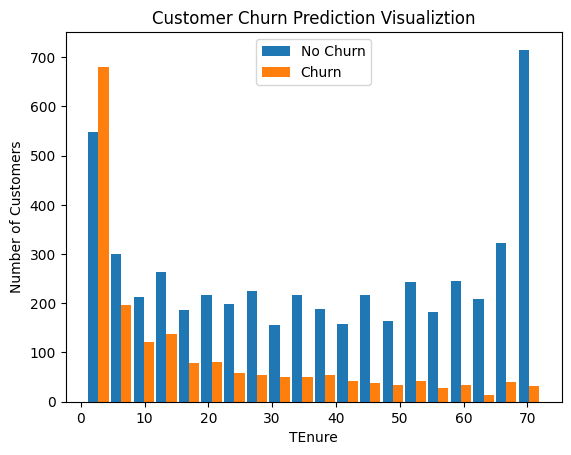

In [ ]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_Churn_yes = df1[df1.Churn == 'Yes'].tenure


plt.xlabel("TEnure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_no,tenure_Churn_yes],rwidth=0.9,bins=20,label=['No Churn','Churn'])
plt.legend()

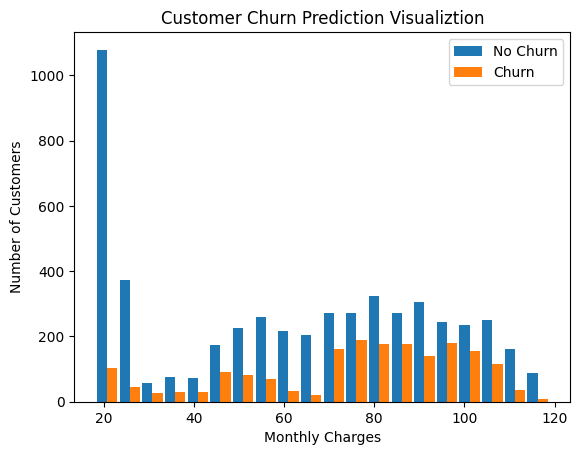

In [ ]:
mc_churn_no = df1[df1.Churn == 'No']['MonthlyCharges']
mc_churn_yes = df1[df1.Churn == 'Yes']['MonthlyCharges']

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_no,mc_churn_yes],rwidth=0.9,bins=20,label=['No Churn','Churn'])
plt.legend()

In [ ]:
uniq(df1)

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   

In [ ]:
df1.replace('No internet service' , 'No' , inplace=True)
df1.replace('No phone service' , 'No' , inplace=True)

In [ ]:
uniq(df1)

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
['No' 'Yes']
MultipleLines
['No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes']
OnlineBackup
['Yes' 'No']
DeviceProtection
['No' 'Yes']
TechSupport
['No' 'Yes']
StreamingTV
['No' 'Yes']
StreamingMovies
['No' 'Yes']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn
['No' 'Yes']


In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [ ]:
for col in yes_no_columns:
  df1[col].replace({'Yes':1,'No':0},inplace=True)

In [ ]:
uniq(df1)

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
[0 1]
MultipleLines
[0 1]
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
[0 1]
OnlineBackup
[1 0]
DeviceProtection
[0 1]
TechSupport
[0 1]
StreamingTV
[0 1]
StreamingMovies
[0 1]
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
[1 0]
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn
[0 1]


In [ ]:
df1.gender.replace({'Female':1 , 'Male':0} , inplace = True)

In [ ]:
df1.gender.unique()

array([1, 0])

***ONE HOT ENCODING***

In [ ]:
pd.get_dummies(df1.InternetService)

,DSL,Fiber optic,No
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,True,False
...,...,...,...
7038,True,False,False
7039,False,True,False
7040,True,False,False
7041,False,True,False


In [ ]:
df2 = pd.get_dummies(data = df1 , columns=['InternetService','Contract' , 'PaymentMethod'])

In [ ]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.shape

(7032, 27)

In [ ]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [ ]:
df2.InternetService_DSL = df2.InternetService_DSL.astype('int64')

In [ ]:
uniq(df2)

gender
[1 0]
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
[0 1]
MultipleLines
[0 1]
OnlineSecurity
[0 1]
OnlineBackup
[1 0]
DeviceProtection
[0 1]
TechSupport
[0 1]
StreamingTV
[0 1]
StreamingMovies
[0 1]
PaperlessBilling
[1 0]
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn
[0 1]
InternetService_DSL
[1 0]
InternetService_Fiber optic
[False  True]
InternetService_No
[False  True]
Contract_Month-to-month
[ True False]
Contract_One year
[False  True]
Contract_Two year
[False  True]
PaymentMethod_Bank transfer (automatic)
[False  True]
PaymentMethod_Credit card (automatic)
[False  True]
PaymentMethod_Electronic check
[ True False]
PaymentMethod_Mailed check
[False  T

In [ ]:
colstocon = ['InternetService_DSL' , 'InternetService_Fiber optic' , 'InternetService_No' , 'Contract_Month-to-month' , 'Contract_One year' , 'Contract_Two year' ,'PaymentMethod_Bank transfer (automatic)' , 'PaymentMethod_Credit card (automatic)' , 'PaymentMethod_Electronic check' , 'PaymentMethod_Mailed check']
for col in colstocon:
  df2[col] = df2[col].astype('int64')

In [ ]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3694,1,0,1,1,67,1,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
2556,0,0,1,0,45,1,1,1,0,1,...,0,1,0,1,0,0,0,0,0,1
1994,0,0,0,0,22,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
uniq(df2)

gender
[1 0]
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
[0 1]
MultipleLines
[0 1]
OnlineSecurity
[0 1]
OnlineBackup
[1 0]
DeviceProtection
[0 1]
TechSupport
[0 1]
StreamingTV
[0 1]
StreamingMovies
[0 1]
PaperlessBilling
[1 0]
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn
[0 1]
InternetService_DSL
[1 0]
InternetService_Fiber optic
[0 1]
InternetService_No
[0 1]
Contract_Month-to-month
[1 0]
Contract_One year
[0 1]
Contract_Two year
[0 1]
PaymentMethod_Bank transfer (automatic)
[0 1]
PaymentMethod_Credit card (automatic)
[0 1]
PaymentMethod_Electronic check
[1 0]
PaymentMethod_Mailed check
[0 1]


In [ ]:
cols_to_Scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_Scale] = scaler.fit_transform(df2[cols_to_Scale])

In [ ]:
uniq(df2)

gender
[1 0]
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
tenure
[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService
[0 1]
MultipleLines
[0 1]
OnlineSecurity
[0 1]
OnlineBackup
[1 0]
DeviceProtection
[0 1]
TechSupport
[0 1]
Stream

In [ ]:
X = df2.drop('Churn' , axis = 1)
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape , X_test.shape

((5625, 26), (1407, 26))

In [ ]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [ ]:
len(X_train.columns)

26

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout

In [ ]:
model = Sequential([
    Dense(26 , input_shape = (26,) , activation='relu'),
    Dense(13,activation='relu'),
    Dense(1 , activation='sigmoid')])

model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

model.fit(X_train , y_train , epochs=100 , batch_size=10)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7448 - loss: 0.5190
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7909 - loss: 0.4242
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8091 - loss: 0.4047
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8048 - loss: 0.4081
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7955 - loss: 0.4214
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8109 - loss: 0.4065
Epoch 7/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8040 - loss: 0.4158
Epoch 8/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8059 - loss: 0.4074
Epoch 9/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7987 - loss: 0.4069
Epoch 10/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8104 - loss: 0.3994
Epoch 11/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8170 - loss: 0.3892
Epoch 12/100
563/563 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test , y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7819 - loss: 0.5009


[0.5081436038017273, 0.7732764482498169]

In [ ]:
yp = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
yp

array([[0.3828185 ],
       [0.6414361 ],
       [0.03657509],
       ...,
       [0.62965125],
       [0.86919874],
       [0.8481221 ]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       999
           1       0.63      0.53      0.58       408

    accuracy                           0.77      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.76      0.77      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

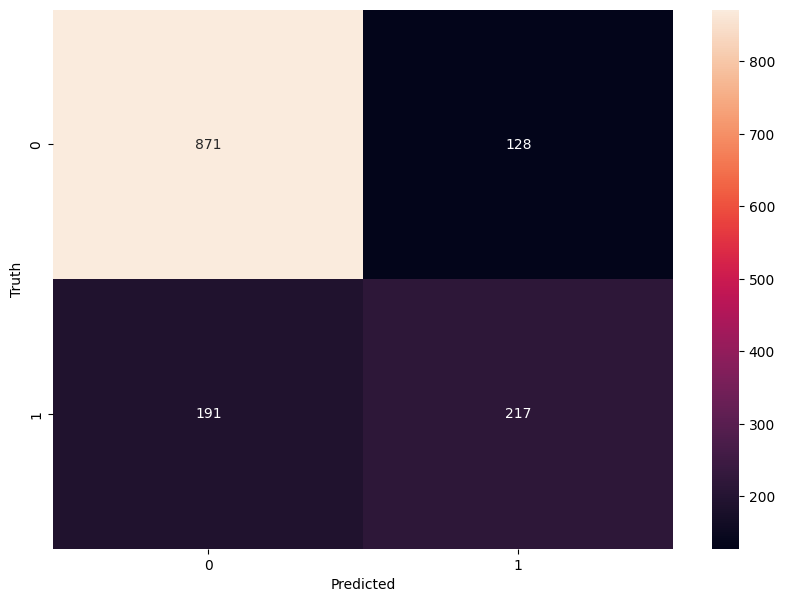

In [ ]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_test.shape

(1407,)

In [ ]:
round(862/(862+179),2)

0.83

Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank.

2) Once model is built, print classification report and analyze precision, recall and f1-score